I have the clean data from the previous step that includes 3 dataframes: <br>
- Order: sales data organized by order
- Items: sales data organized by line item
- Cust: sales data organized and aggregated by customer id

I will first focus on the customer sales data, as that one is higher level. Here are the columns in that dataframe:
- Cust_ID: unique indentifier for each customer <br>
- Life_Total: total dollars spent by that customer over their lifetime <br>
- Avg_Order: total dollars spent by that customer per order <br>
- Orders: number of orders by that customer <br>
- Sub_Total: sum in dollars spent by the customer not including shipping and tax <br>
- Ship_Total: total dollars spent on shipping over the life of the customer <br>
- Refund_Total: total dollars refunded to the customer <br>
- Marketing: yes or no if the customer accepts marketing (may convert to booleen) <br>
- Total_Items: total number of items ordered by the customer over their lifetime <br>
- Avg_Items: average number of items per order
- first_order: datetime of first order <br>
- last_order: datetime of last order <br>
- server: mail server used by the customer <br>
- Disc_Total: total in dollars that the customer over their lifetime <br>
- Vendor: 0 = first order from Company, 1 = first order from outside source <br>
- Emp: True = employee of the company, False = regular customer <br>
- Source: what type of device was used to place the order <br>
- ship_bill: does the shipping and billing zip code match <br>
- Area_Code: area code of the shipping phone number <br>
- Ship_Zip: zip code of the shipping address

In [55]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import ppscore as pps

In [56]:
import pickle
os.chdir("C:\Springboard\Github\Capstone2_cust\Intermediate_Data")

In [57]:
# load the pickled version of the Customer DF (Cust)
df = pickle.load(open("Cust1.pkl", "rb"))
# look at the first 10 rows of this file
df.head(10)

,Cust_ID,Life_Total,Avg_Order,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing,Total_Items,Avg_Items,first_order,last_order,server,Disc_Total,Vendor,Emp,Source,ship_bill,Area_Code,Ship_Zip
0,75306.0,0.00,0.00,1,0.00,0.0,0.0,no,4,4.0,2020-03-18 04:04:53+00:00,2020-03-18 04:04:53+00:00,custom,154.00,0.0,True,iphone,False,NaN,32817
1,112053.0,145.58,145.58,1,145.58,0.0,0.0,yes,2,2.0,2019-11-26 21:44:16+00:00,2019-11-26 21:44:16+00:00,custom,16.17,1.0,False,web,True,404,30087
2,112055.0,137.55,137.55,1,137.55,0.0,0.0,no,5,5.0,2019-11-26 20:52:08+00:00,2019-11-26 20:52:08+00:00,custom,0.00,1.0,False,web,True,845,12545
3,112095.0,22.98,22.98,1,22.98,0.0,0.0,yes,2,2.0,2019-11-26 18:12:04+00:00,2019-11-26 18:12:04+00:00,custom,0.00,1.0,False,web,True,262,53402
4,130108.0,28.00,28.00,1,28.00,0.0,0.0,no,1,1.0,2019-08-07 18:14:49+00:00,2019-08-07 18:14:49+00:00,custom,0.00,0.0,False,web,True,617,01983
5,130110.0,12.00,12.00,1,12.00,0.0,0.0,yes,1,1.0,2019-08-07 18:05:28+00:00,2019-08-07 18:05:28+00:00,custom,0.00,0.0,False,web,True,740,43143
6,130188.0,42.00,42.00,1,42.00,0.0,0.0,no,2,2.0,2019-08-07 03:45:52+00:00,2019-08-07 03:45:52+00:00,custom,0.00,0.0,False,web,True,701,58801
7,130231.0,27.20,27.20,1,27.20,0.0,0.0,yes,1,1.0,2019-08-06 22:00:54+00:00,2019-08-06 22:00:54+00:00,custom,6.80,0.0,False,web,True,754,33026
8,130241.0,22.00,22.00,1,22.00,0.0,22.0,yes,2,2.0,2019-08-06 20:22:25+00:00,2019-08-06 20:22:25+00:00,custom,0.00,0.0,False,web,True,NaN,01880
9,130245.0,100.00,100.00,1,100.00,0.0,100.0,yes,5,5.0,2019-08-06 19:59:05+00:00,2019-08-06 19:59:05+00:00,custom,0.00,0.0,False,web,True,617,01880


In [58]:
# let's add a column if they are a repeat customer (ordered more than once)
df['repeat'] = df['Orders'] > 1

In [59]:
df['weekday'] = df['first_order'].dt.day_name()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39771 entries, 0 to 39770
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Cust_ID       39771 non-null  float64            
 1   Life_Total    39771 non-null  float64            
 2   Avg_Order     39771 non-null  float64            
 3   Orders        39771 non-null  int64              
 4   Sub_Total     39771 non-null  float64            
 5   Ship_Total    39771 non-null  float64            
 6   Refund_Total  39771 non-null  float64            
 7   Marketing     39771 non-null  object             
 8   Total_Items   39771 non-null  int64              
 9   Avg_Items     39771 non-null  float64            
 10  first_order   39771 non-null  datetime64[ns, UTC]
 11  last_order    39771 non-null  datetime64[ns, UTC]
 12  server        39771 non-null  object             
 13  Disc_Total    39771 non-null  float64            
 14  Vendor

In [61]:
df.describe()

,Cust_ID,Life_Total,Avg_Order,Orders,Sub_Total,Ship_Total,Refund_Total,Total_Items,Avg_Items,Disc_Total,Vendor
count,3.977100e+04,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000
mean,2.130449e+12,102.437610,62.273366,1.546856,99.469555,1.678049,2.155301,3.599733,2.177243,2.319155,0.551709
std,5.576757e+11,142.792375,44.557245,1.582350,138.446262,5.369948,17.297491,4.872447,1.107580,21.090725,0.497325
min,7.530600e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.928451e+12,32.980000,32.980000,1.000000,32.980000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,2.073490e+12,61.960000,54.970000,1.000000,57.960000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000
75%,2.569577e+12,107.160000,73.536667,1.000000,103.560000,0.000000,0.000000,4.000000,2.428571,0.000000,1.000000
max,2.779653e+12,4813.390000,683.300000,48.000000,4516.200000,297.190000,642.550000,142.000000,40.000000,1723.380000,1.000000


These are very interesting. The outliers are extremely different. Let's visualize it.

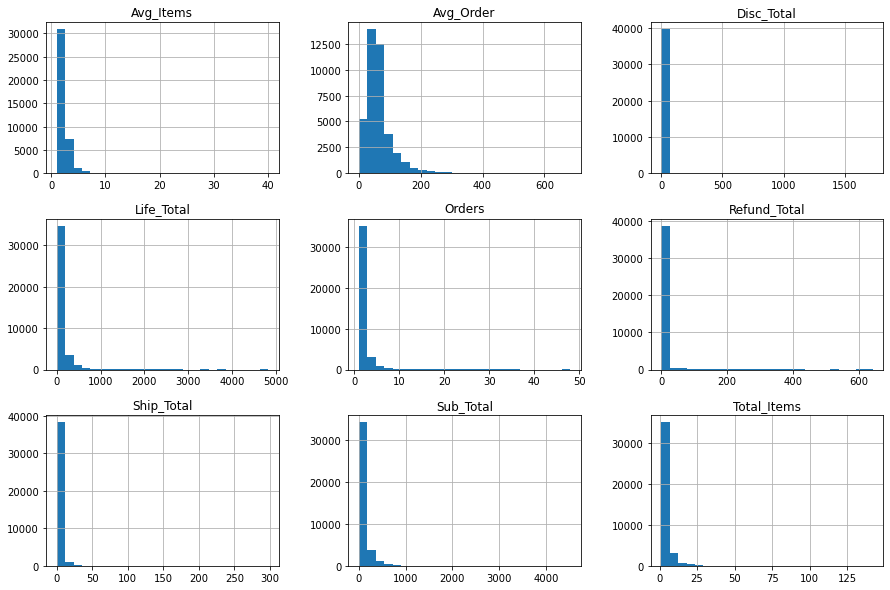

In [62]:
hist = df[['Life_Total', 'Avg_Order', 'Orders', 'Sub_Total', 'Ship_Total', 'Refund_Total', 'Total_Items', 'Avg_Items', 'Disc_Total', 'weekday']].hist(bins=25, figsize=(15,10))

Just as the stats indicated, there is a massive difference, where a few customers make up the vast majority of orders and money spent.

In [63]:
# number of repeat customers
df['repeat'].value_counts()

False    30072
True      9699
Name: repeat, dtype: int64

Let's take a look at those same histograms just for the repeat customers

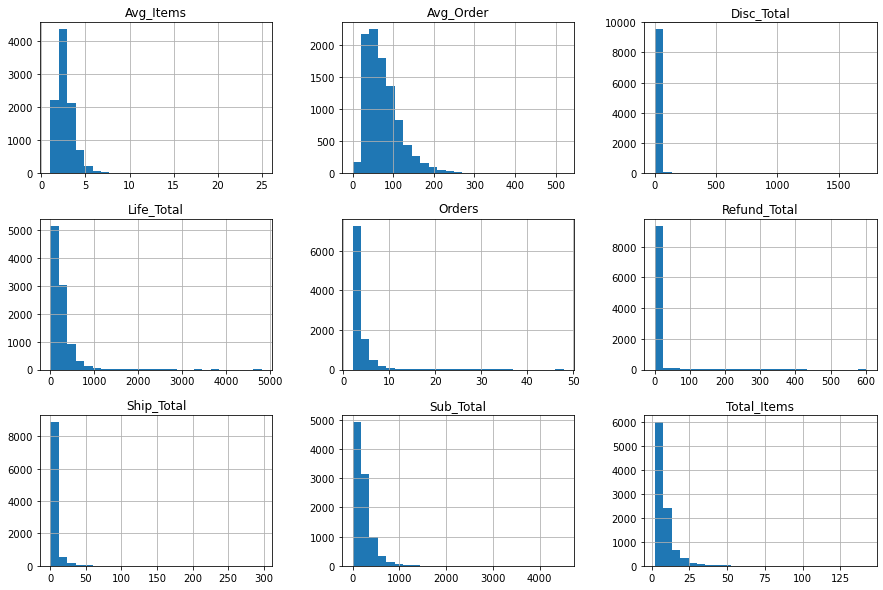

In [64]:
rep = df[df['repeat']]
_ = rep[['Life_Total', 'Avg_Order', 'Orders', 'Sub_Total', 'Ship_Total', 'Refund_Total', 'Total_Items', 'Avg_Items', 'Disc_Total']].hist(bins=25, figsize=(15,10))

These plots do reflect a group of buyers that has purchased more as measured by money, items, and total orders. The distribution still looks exponential.

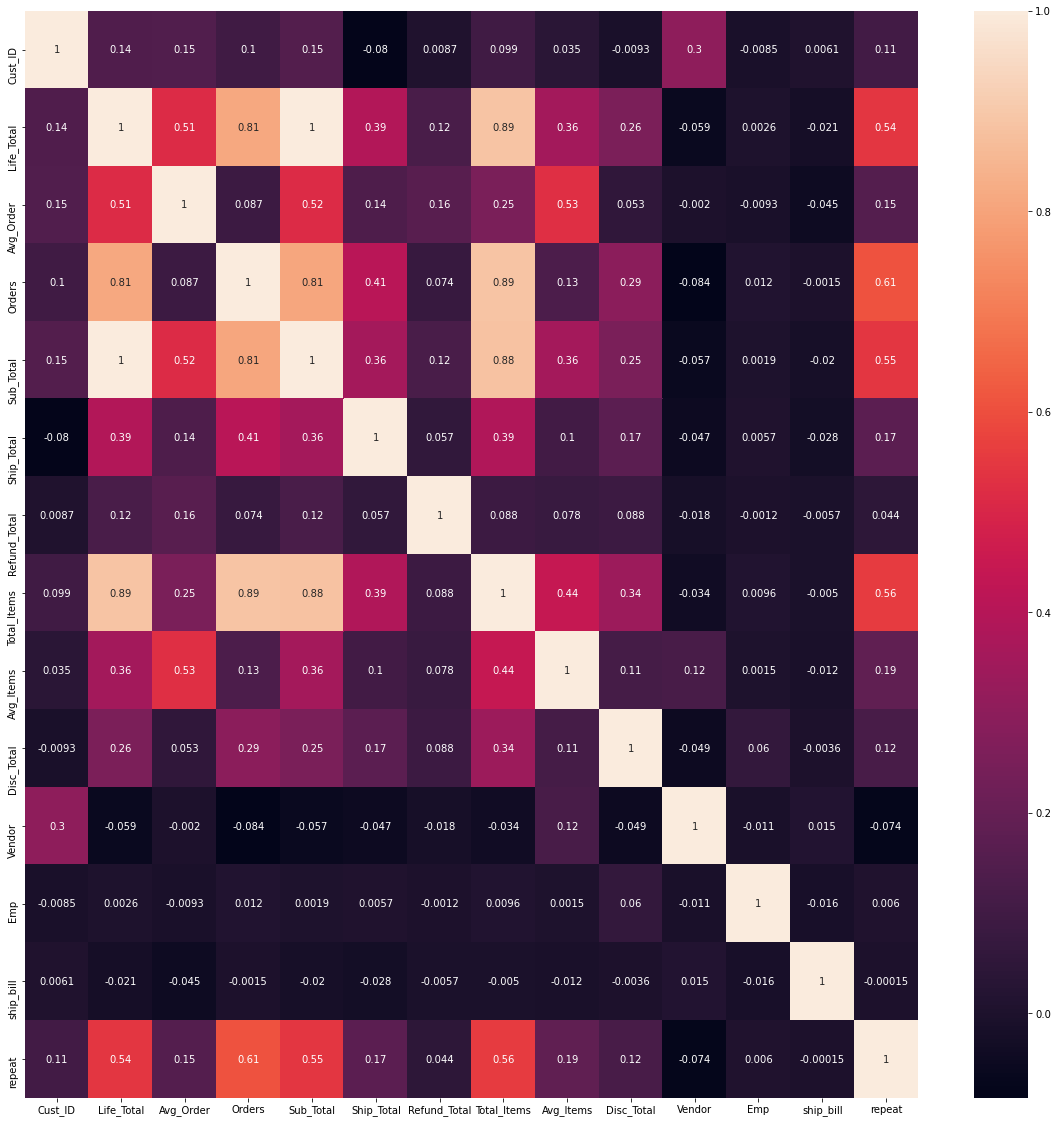

In [65]:
# let's look at the correlation coefficient 
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(corr, annot=True, ax=ax)

These all look very much as expected: of course if they are a repeat customer they will have more order and a higher lifetime total. We may want to consider adding more features to this heatmap to see if there is correlation from items that could help predict sales.

In [66]:
# look to see if we can save this groupby values into a DF. Then do the calculations in that DF and plot
temp = df.groupby([df["first_order"].dt.year, df["first_order"].dt.month]).sum()

In [67]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 95 entries, (2012, 10) to (2020, 9)
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cust_ID       95 non-null     float64
 1   Life_Total    95 non-null     float64
 2   Avg_Order     95 non-null     float64
 3   Orders        95 non-null     int64  
 4   Sub_Total     95 non-null     float64
 5   Ship_Total    95 non-null     float64
 6   Refund_Total  95 non-null     float64
 7   Total_Items   95 non-null     int64  
 8   Avg_Items     95 non-null     float64
 9   Disc_Total    95 non-null     float64
 10  Vendor        95 non-null     float64
 11  Emp           95 non-null     float64
 12  ship_bill     95 non-null     float64
 13  repeat        95 non-null     float64
dtypes: float64(12), int64(2)
memory usage: 10.9 KB


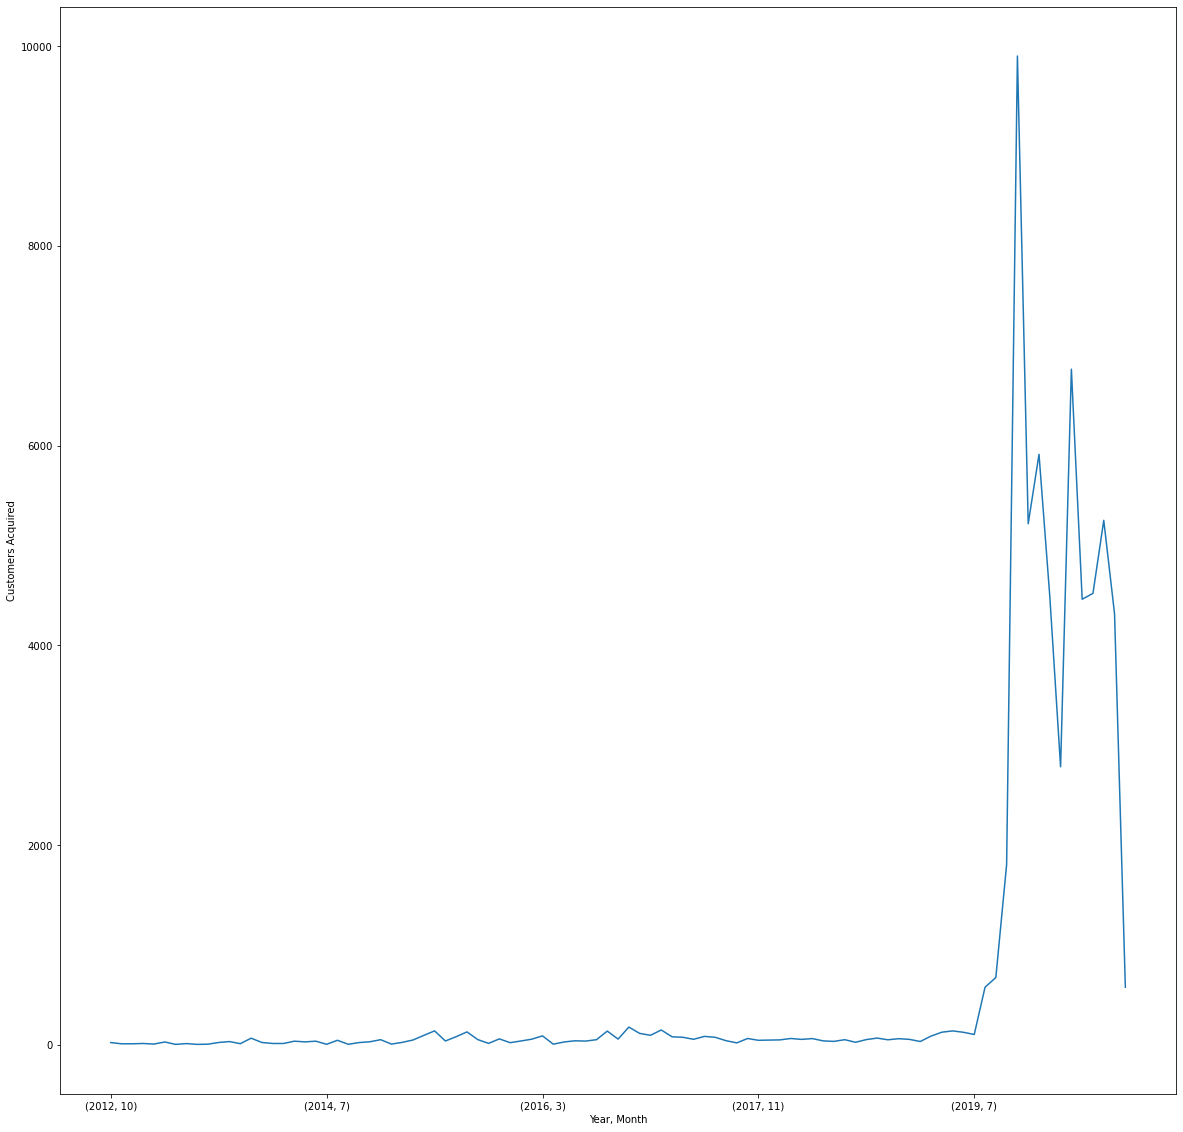

In [68]:
fig, ax = plt.subplots(figsize=(20,20))
_ = temp['Orders'].plot(kind="line")
_ = plt.xlabel('Year, Month')
_ = plt.ylabel('Customers Acquired')

Looks like an explosion of orders starting in August 2019. We will come back to this to see if this affected Churn or Customer Retention. Let's start by looking at if they were a repeat customer based on the date.

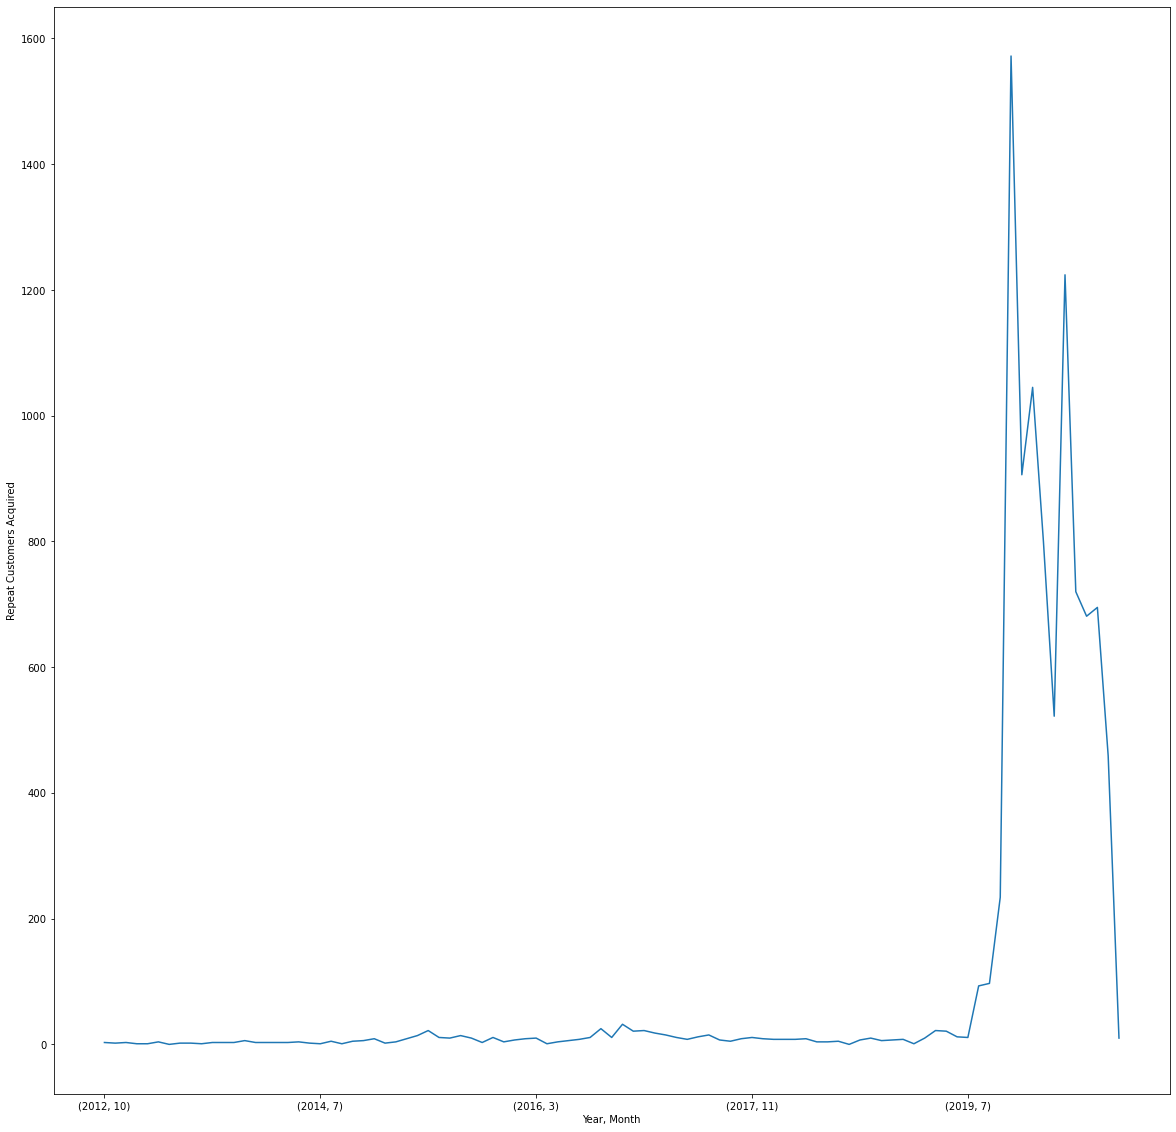

In [69]:
# number of repeat customers that were acquired during a time
fig, ax = plt.subplots(figsize=(20,20))
_ = temp['repeat'].plot(kind="line")
_ = plt.xlabel('Year, Month')
_ = plt.ylabel('Repeat Customers Acquired')

Honestly, this looks like it just mirrors the customer first purchase date (even for churned customers) <br>
<br>
Let's look at the percentage of repeat customers acquired during a particular time 

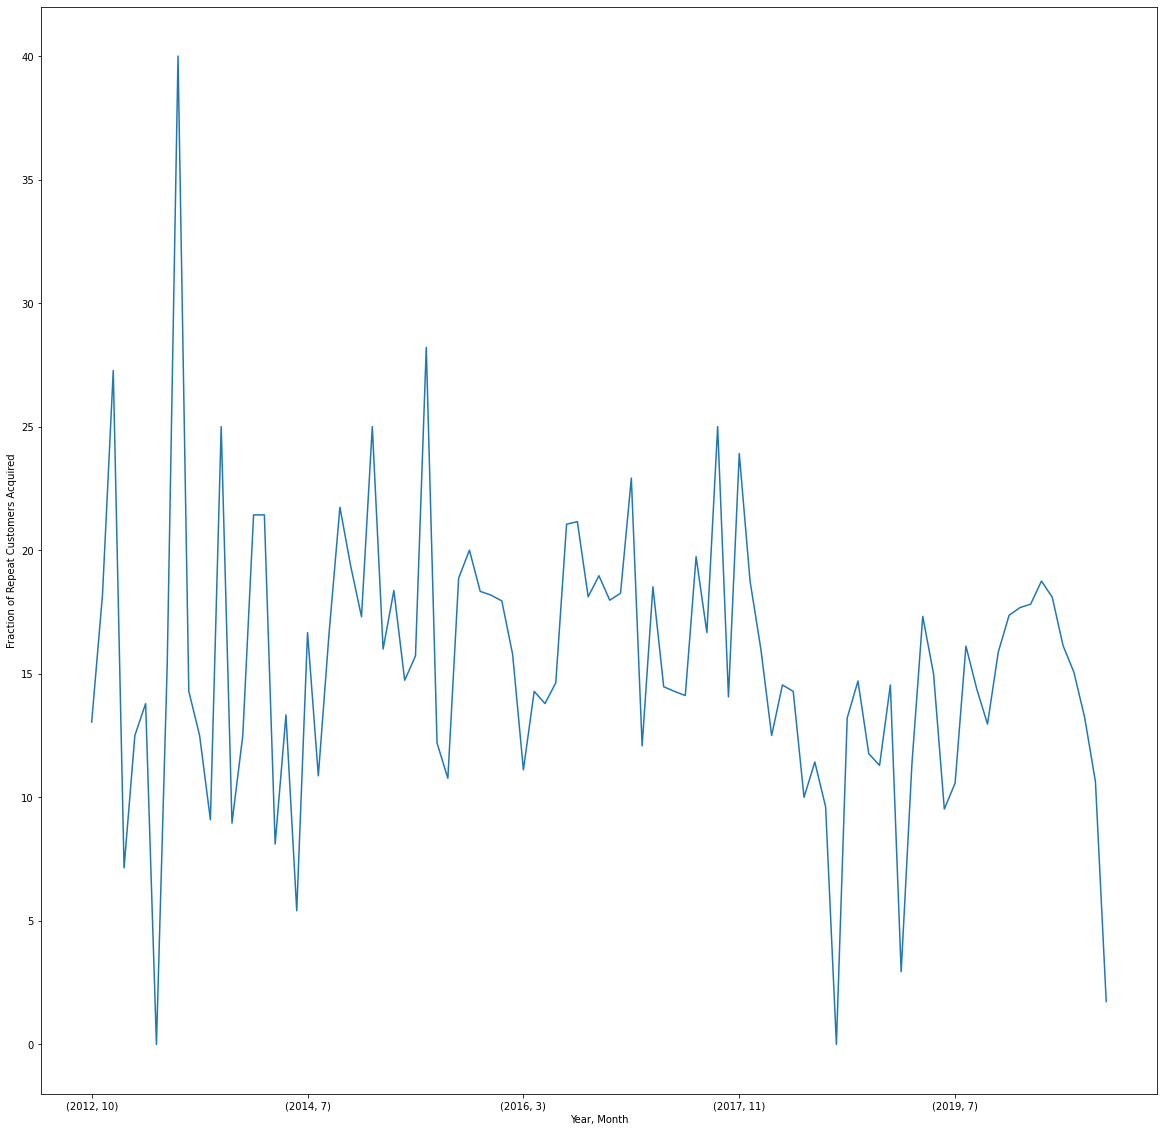

In [70]:
# let's see the percentage of repeat customers acquired over time
temp['repeat_prc'] = (temp['repeat']/temp['Orders'])*100
# number of repeat customers that were acquired during a time
fig, ax = plt.subplots(figsize=(20,20))
_ = temp['repeat_prc'].plot(kind="line")
_ = plt.xlabel('Year, Month')
_ = plt.ylabel('Fraction of Repeat Customers Acquired')

This looks almost random over time with a slight downward trend starting at the end of 2017. <br>
<br>
Let's see if the days of the week that a customer was first acquired has an impact on repeat customers

In [71]:
days = df.groupby(df["weekday"]).sum()
days = days.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
days

,Cust_ID,Life_Total,Avg_Order,Orders,Sub_Total,Ship_Total,Refund_Total,Total_Items,Avg_Items,Disc_Total,Vendor,Emp,ship_bill,repeat
weekday,,,,,,,,,,,,,,
Monday,1.145045e+16,573141.36,334846.278751,8643,555994.09,8959.39,12695.45,20325,11684.566868,14864.93,2975.0,0.0,4942.0,1402.0
Tuesday,1.126713e+16,560010.64,333064.413777,8377,544577.42,9195.79,12124.37,19834,11686.065111,11740.85,2895.0,1.0,4839.0,1345.0
Wednesday,1.137624e+16,536903.02,331016.673997,8091,520420.13,9395.57,11797.73,18699,11427.960683,12780.88,2897.0,2.0,4824.0,1272.0
Thursday,1.128423e+16,531444.05,332926.694022,8047,514907.23,9642.92,11289.74,18446,11456.299161,12796.94,2934.0,0.0,4833.0,1256.0
Friday,1.239933e+16,608900.98,365601.662262,9235,591102.36,10437.48,11856.50,21476,12807.126768,15923.72,3255.0,0.0,5417.0,1479.0
Saturday,1.338254e+16,635190.58,385461.973516,9667,617706.71,9607.30,11954.78,22345,13597.508427,13232.05,3468.0,0.0,5848.0,1450.0
Sunday,1.357019e+16,628455.54,393756.334861,9460,611295.74,9499.23,13999.90,22040,13931.622552,10895.76,3518.0,1.0,5893.0,1495.0


This is interesting. Let's plot it out. Lifetime total, total orders, and number of repeat customers

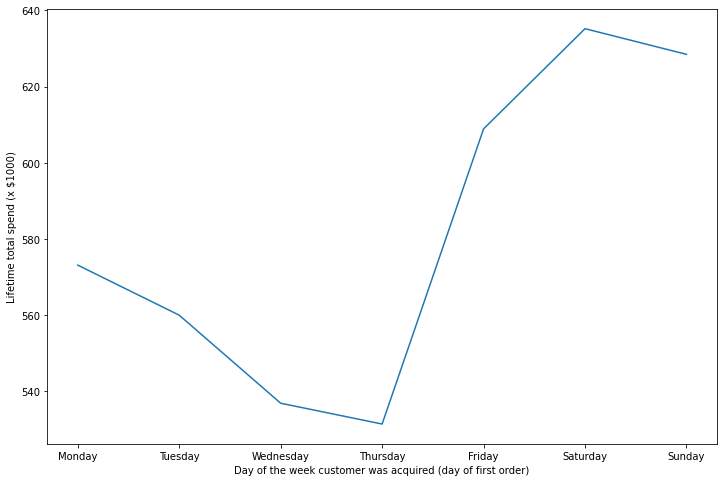

In [72]:
# plot the total lifetime purchase vs. day of the week
_ = (days['Life_Total']/1000).plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired (day of first order)')
_ = plt.ylabel('Lifetime total spend (x $1000)')

This is really cool to see; customers that place their first order on Saturday account for $100k more in lifetime revenue than customers that place their first order on Thursday. This could be sheer number of customers acquired on Saturday or stronger loyalty; we will see when we do some more calculations with this further down. Let's see how some of the other data relates to the day of the week a customer was first acquired. Let's look at:<br>
- Repeat (number of repeat customers acquired on a particular day)
- Total_Items (over lifetime)

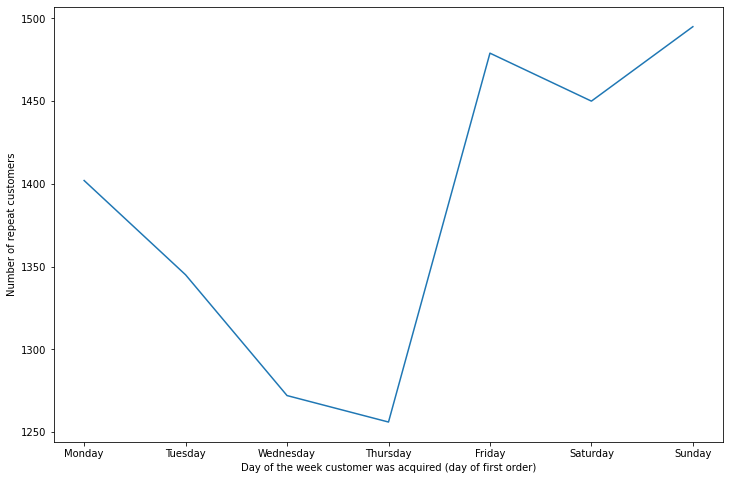

In [73]:
# plot the total lifetime purchase vs. day of the week
_ = (days['repeat']).plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired (day of first order)')
_ = plt.ylabel('Number of repeat customers')

This shows a very similar trend to the lifetime purchases, except Saturday shows a little dip. It's probably because Saturday orders could be a lot of one-time orders or those ordering on Saturday, could just be larger. We can look at that calculation later.

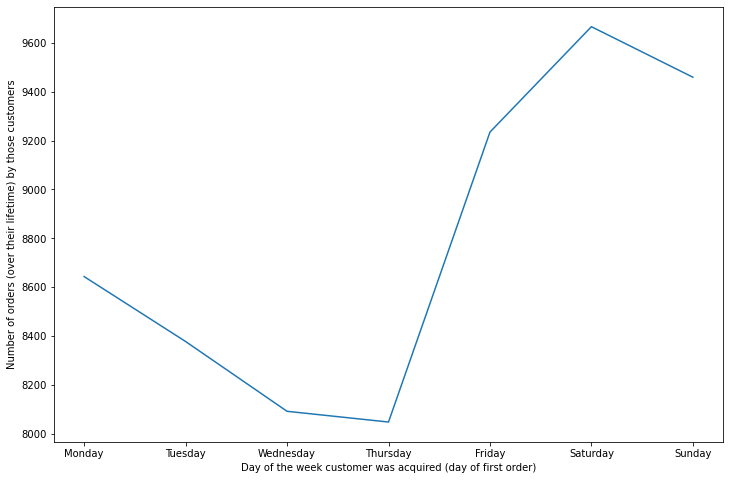

In [74]:
# plot the total lifetime purchase vs. day of the week
_ = (days['Orders']).plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired (day of first order)')
_ = plt.ylabel('Number of orders (over their lifetime) by those customers')

This looks similar to total lifetime spent graph. I can dive into these numbers more as we look at order data.

## let's take a look at the order data so that we can calculate:
## retention rate, repeat rate, and churn rate

In [75]:
# load the pickled version of the Customer DF (Cust)
Orders = pickle.load(open("Order1.pkl", "rb"))
# look at the first 10 rows of this file
Orders.head(10)

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Employee,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,Cust_ID,ITEMS,compared
Name,,,,,,,,,,,,,,,,,,,,,
#10000,paid,fulfilled,yes,8.0,0.00,8.62,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 15:49:51+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.029549e+12,1,NaN
#10001,paid,fulfilled,yes,44.0,0.00,44.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:22:12+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.604838e+12,2,NaN
#10002,paid,fulfilled,yes,34.0,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:57:00+00:00,1,...,False,NaN,web,0.0,yahoo.com,False,813,1.928534e+12,1,-1.0
#10003,paid,fulfilled,yes,34.0,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:15:01+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,1.825239e+12,1,-1.0
#10004,paid,fulfilled,yes,8.0,0.00,8.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:26:41+00:00,1,...,False,NaN,web,0.0,gmail.com,True,513,1.886785e+12,1,NaN
#10005,paid,fulfilled,yes,34.0,14.55,48.55,0.0,USPS First Class International,2019-10-25 17:26:46+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,1.825258e+12,1,-1.0
#10006,partially_refunded,fulfilled,yes,56.0,8.99,64.99,0.0,Priority Mail,2019-10-25 18:24:25+00:00,1,...,False,NaN,web,0.0,gmail.com,False,NaN,1.825330e+12,2,NaN
#10007,paid,fulfilled,yes,80.0,0.00,80.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 18:38:36+00:00,1,...,False,NaN,web,0.0,gmail.com,False,NaN,1.825345e+12,5,NaN
#10008,paid,fulfilled,yes,72.0,0.00,72.00,8.0,USPS First Class Package (2-5 Business Days),2019-10-25 18:59:44+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.010503e+12,4,NaN


In [76]:
Orders.shape

(61520, 29)

This looks good and loaded. I want to add a column with weekday

In [77]:
Orders['weekday'] = Orders['Created at'].dt.day_name()

Since we are looking for year-over-year retention rate (and repeat rate and churn rate) we need to group the order data by year. Let's take a look at those values now before considering the considering those rates.

In [78]:
Orders.groupby(Orders["Created at"].dt.year).sum()

,Subtotal,Shipping,Total,Discount Amount,Lineitem quantity,Lineitem price,Lineitem compare at price,Lineitem requires shipping,Refunded Amount,Vendor,Outstanding Balance,Employee,Lineitem discount,ship_bill,Cust_ID,ITEMS,compared
Created at,,,,,,,,,,,,,,,,,
2012,7.180000e+02,109.18,8.374200e+02,56.00,25,372.00,0.00,22.0,0.00,0.0,0.00,0.0,0.0,19.0,6.062206e+11,63,0.000000
2013,4.522300e+03,750.92,5.415640e+03,297.50,184,2599.00,0.00,142.0,89.72,0.0,0.00,0.0,0.0,126.0,5.895669e+13,308,0.000000
2014,8.258700e+03,772.29,9.405470e+03,359.38,411,3204.90,173.72,189.0,0.00,0.0,30.00,0.0,0.0,171.0,1.079906e+14,737,13.089277
2015,2.029540e+04,2041.38,2.313385e+04,1581.00,764,9884.30,364.70,514.0,189.29,0.0,150.00,0.0,0.0,442.0,1.895902e+14,1589,48.285714
2016,3.710759e+04,1778.51,4.065904e+04,1282.31,756,17923.01,1287.25,686.0,113.92,0.0,-13.81,0.0,0.0,634.0,4.160625e+14,1641,75.714029
2017,6.963005e+04,1359.40,7.387878e+04,5490.04,1254,40790.80,1929.00,1164.0,868.18,0.0,-200.00,0.0,0.0,1052.0,1.240192e+15,2385,inf
2018,8.750564e+04,5769.28,9.507321e+04,9477.43,1539,42847.82,-5316.00,1409.0,269.11,29.0,-4.64,0.0,0.0,1313.0,2.089229e+15,3396,-99.000000
2019,8.058769e+05,18019.04,8.326500e+05,24563.98,14837,281569.12,-53279.27,9022.0,26823.96,5414.0,38.48,1.0,0.0,13349.0,2.788267e+16,33078,inf
2020,2.922089e+06,36137.68,2.992993e+06,49127.49,43446,795134.63,168887.22,19033.0,57364.29,23826.0,923.71,7.0,0.0,39385.0,1.026025e+17,99968,947.392728


## Retention Rate

In [79]:
# all purchases in 2018
pur18 = Orders[Orders["Created at"].dt.year == 2018]
# number of customers that purchased in 2018
cust18 = pur18.groupby('Cust_ID').count()
# counts up the rows of those unique customer that purchased in 2018
tot18 = cust18.shape[0]
tot18

744

In [80]:
# all purchases in 2018 and 2019
pur1819 = Orders[Orders["Created at"].dt.year.isin([2018,2019])]
# number of unique customers that purchased in 2018 or 2019
cust1819 = pur1819.groupby('Cust_ID').count()
# pur1819.groupby('Cust_ID').count()
tot1819 = cust1819.shape[0]
tot1819

11046

In [81]:
# all purchases in 2019
pur19 = Orders[Orders["Created at"].dt.year == 2019]
# number of unique customers that purchased in 2019
cust19 = pur19.groupby('Cust_ID').count()
# counts up the rows of those unique customer that purchased in 2019
tot19 = cust19.shape[0]
tot19

10546

In [82]:
# merge to find all of the customers that were purchased in both 2018 AND 2019
ret18 = pd.merge(cust18, cust19, how='inner', on='Cust_ID')
retent18 = ret18.shape[0]
retent18

244

That was the number of customer that purchased in 2018 that also purchase in 2019. They were retained from 2018 to 2019. Let's see the percentage

In [83]:
# percent of customer retained from 2018 to 2019
(retent18/tot18)*100

32.795698924731184

That was a good calculation of the number of customer that were retained from 2018 to 2019. It would be best if we generalize this to calculate the retention rate for each year.

### General retention rate calculation that can be applied to all years

In [84]:
# see if I can do this for all of the years - generalize
pur = {}
cust = {}
ret = {}
# creates dictionary of dataframes with orders from each year
for yr in range(2012,2021):
    # calculates the purchase in a specific year
    pur[yr] = Orders[Orders["Created at"].dt.year == yr]
    cust[yr] = pur[yr].groupby('Cust_ID').count()
    
# merges those dataframes to calculate the retention rate
for yr in range(2012,2020):
    retent = pd.merge(cust[yr], cust[yr+1], how='inner', on='Cust_ID')
    ret[yr] = (retent.shape[0]/cust[yr].shape[0])*100
ret

{2012: 19.047619047619047,
 2013: 16.363636363636363,
 2014: 24.242424242424242,
 2015: 21.179624664879356,
 2016: 29.898989898989896,
 2017: 34.394904458598724,
 2018: 32.795698924731184,
 2019: 20.77564953536886}

I'm so stoked to get these number year over year. Let's plot.

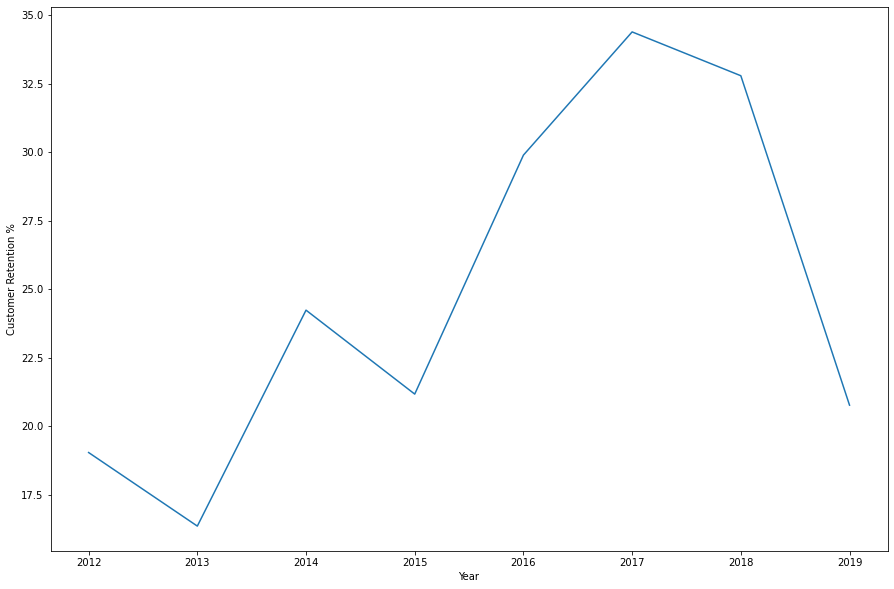

In [85]:
# convert to Dataframe
rentention = pd.DataFrame.from_dict(ret, orient='index', columns=['retention'])
# graph
_ = rentention.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Customer Retention %')

Notice a dip from 2018 to 2019. This maybe because a LOT more customer were acquired in 2019 than in 2018; also 2020 is not over yet (sales data only through September), so we are not counting a completed time period for Retention rate in 2019. <br>
<br>
That concludes the look at retention rate for now. We can actually use this retention rate to calculate churn rate.

### TO DO - calculate retention rate based on:
### 1. Day of week they first purchased
### 2. SKU they first purchased
### 3. month they first purchased

# Churn Rate

We will take a simplistic view of Churn (since this is not SaaS) of Churn = 1 - Retention Rate

In [86]:
# simplistic view of churn and retention rate
churn = 100 - rentention['retention']
churn.columns = ['churn']

# Customer Lifespan

Average customer lifespan should be easy to calculate from Churn as 1/churn

In [87]:
# since churn is a percentage rather than fraction, we do lifespan = 100 / churn
lifespan = 100 / churn
lifespan

2012    1.235294
2013    1.195652
2014    1.320000
2015    1.268707
2016    1.426513
2017    1.524272
2018    1.488000
2019    1.262238
Name: retention, dtype: float64

This is the average customer lifespan (in years) for the customers that purchased in each of the years. <br>
Let's plot it out.

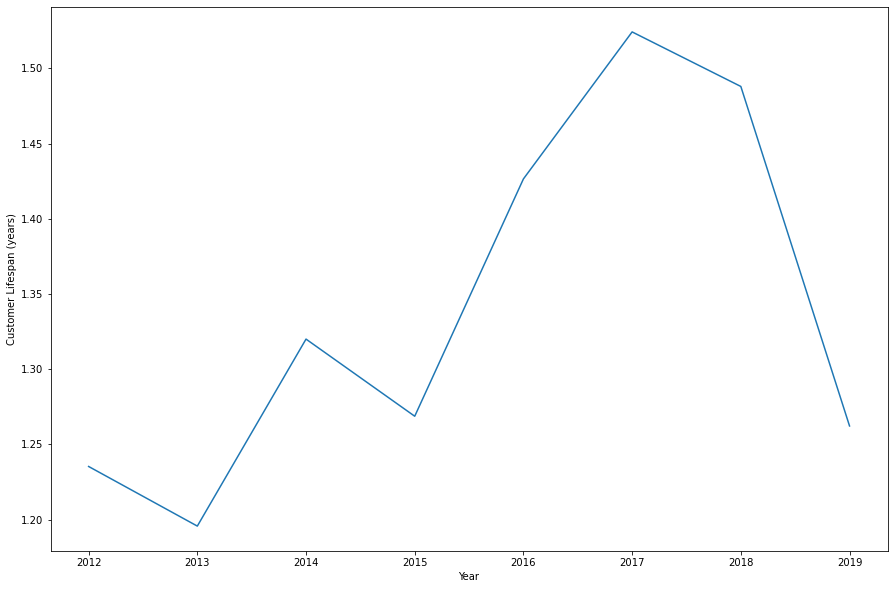

In [88]:
_ = lifespan.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Customer Lifespan (years)')

This just mirrors customer retention rate, as expected. Great to see that validate.

# Repeat Rate

In [89]:
# determine the customer numbers that are duplicated in the dataframe - those are the repeat (2nd, 3rd, 4th, etc. orders)
Rep_ord = Orders['Cust_ID'].duplicated()
# create another dataframe with only repeated orders
Repeat_Orders = Orders[Rep_ord]
# look at the DF
Repeat_Orders

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,Cust_ID,ITEMS,compared,weekday
Name,,,,,,,,,,,,,,,,,,,,,
#10062,paid,fulfilled,yes,46.00,0.0,49.34,0.0,USPS First Class Package (2-5 Business Days),2019-10-26 09:09:23+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,1.825949e+12,1,NaN,Saturday
#10141,paid,fulfilled,yes,43.20,0.0,43.20,0.0,USPS First Class Package (2-5 Business Days),2019-10-27 09:54:48+00:00,1,...,recurring_order,457101,0.0,aol.com,True,NaN,2.545096e+12,2,NaN,Sunday
#1024,paid,fulfilled,yes,32.00,5.0,37.00,0.0,USPS Priority Mail,2012-12-30 02:13:36+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,1.534371e+08,4,NaN,Sunday
#10240,paid,fulfilled,yes,30.00,0.0,30.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-29 01:08:53+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,2.531504e+12,2,NaN,Tuesday
#10263,paid,fulfilled,yes,22.00,0.0,23.60,0.0,USPS First Class Package (2-5 Business Days),2019-10-29 04:51:40+00:00,1,...,NaN,web,0.0,gmail.com,True,951,1.833243e+12,1,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#9995,paid,fulfilled,yes,16.00,0.0,16.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 14:09:45+00:00,2,...,NaN,web,0.0,custom,True,NaN,1.824908e+12,2,NaN,Friday
#9996,paid,fulfilled,yes,32.00,0.0,34.48,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 14:33:07+00:00,1,...,NaN,web,0.0,sbcglobal.net,True,714,2.564832e+12,1,NaN,Friday
#9997,paid,fulfilled,yes,78.00,0.0,78.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 15:04:13+00:00,1,...,recurring_order,457101,0.0,custom,True,NaN,1.994334e+12,3,NaN,Friday


this dataframe looks good; now we can use this with the general order dataframe to calculate our repeat rate for any time period

Let's calculate the repeat rate for each year

In [90]:
# see if I can do this for all of the years - generalize
repeat_rate = {}
total_yr = {}
repeat_yr = {}
# creates dictionary of dataframes with orders from each year
for yr in range(2012,2021):
    # calculates the repeat purchase in a specific year
    repeat_yr[yr] = Repeat_Orders[Repeat_Orders["Created at"].dt.year == yr].shape[0]
    total_yr[yr] = Orders[Orders["Created at"].dt.year == yr].shape[0]
    repeat_rate[yr] = (repeat_yr[yr] / total_yr[yr])*100
repeat_rate

{2012: 4.545454545454546,
 2013: 26.056338028169012,
 2014: 41.269841269841265,
 2015: 36.627906976744185,
 2016: 44.492753623188406,
 2017: 65.47008547008546,
 2018: 70.4088704088704,
 2019: 29.869321717485995,
 2020: 35.058878395709456}

These numbers make sense, as the it's hard to get more repeat business in just your first year; the sales increased significantly in 2019 from acquiring more new customers, so repeat business should be a smaller portion of the overall. <br>
<br>
Let's graph the results to see how it looks.

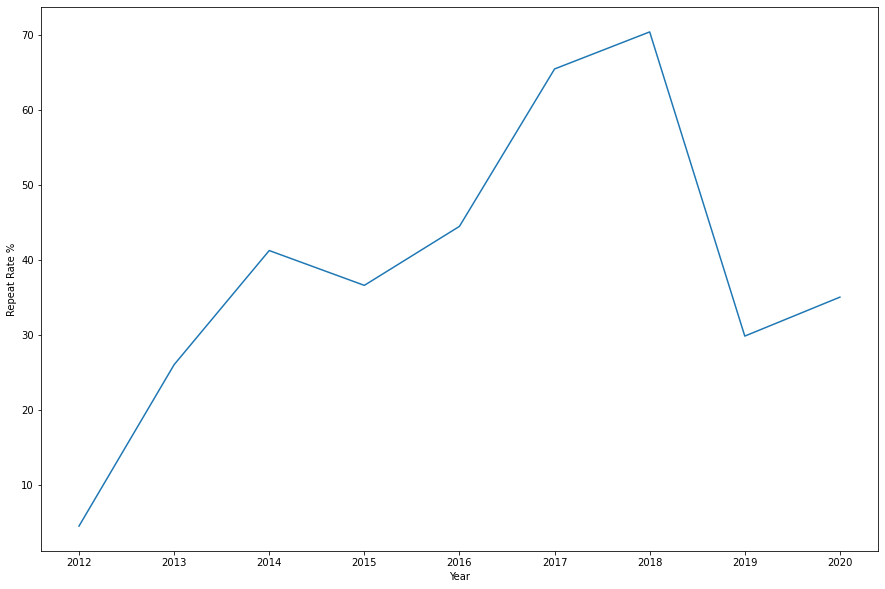

In [91]:
# convert to Dataframe
repeat = pd.DataFrame.from_dict(repeat_rate, orient='index', columns=['repeat_rate'])
# graph
_ = repeat.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Repeat Rate %')

This looks good. It would be good for us to also consider repeat rate by day of the week or month

In [92]:
# calculating repeat rate by day of the week
# see if I can do this for all of the weekdays - generalize
repeat_rt_day = {}
total_day = {}
repeat_day = {}
# creates dictionary of dataframes with orders from each weekday
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    # calculates the repeat purchase in a specific year
    repeat_day[day] = Repeat_Orders[Repeat_Orders["weekday"] == day].shape[0]
    total_day[day] = Orders[Orders["weekday"] == day].shape[0]
    repeat_rt_day[day] = (repeat_day[day] / total_day[day])*100
repeat_rt_day

{'Monday': 35.522066738428414,
 'Tuesday': 37.02908917501192,
 'Wednesday': 38.26756946065842,
 'Thursday': 37.14489480565791,
 'Friday': 37.55197782279561,
 'Saturday': 32.35451720072876,
 'Sunday': 30.048447478528956}

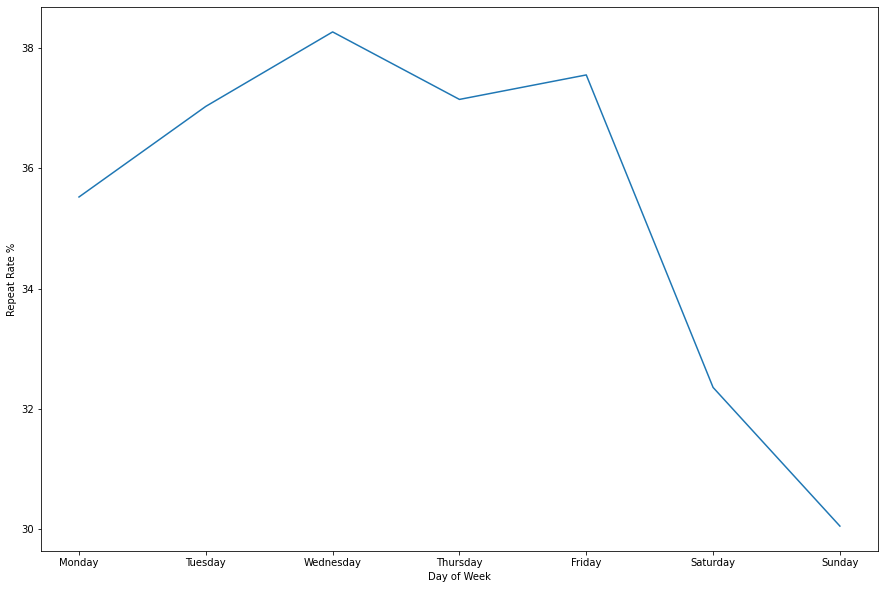

In [93]:
# convert to Dataframe
repeat_days = pd.DataFrame.from_dict(repeat_rt_day, orient='index', columns=['repeat_rate'])
# graph
_ = repeat_days.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Repeat Rate %')

This is really interesting. It looked like repeat customer were acquired more on weekends with Wednesday and Thursday being a low point for acquiring new customers, but it looks like Wednesday, Thursday, and Friday are the days when we see the most repeat purchase (by a small margin).

In [94]:
# calculate repeat rate by month - same code as by year
# see if I can do this for all of the years - generalize
repeat_rate_m = {}
total_m = {}
repeat_m = {}
# creates dictionary of dataframes with orders from each year
for mon in range(1,13):
    # calculates the repeat purchase in a specific year
    repeat_m[mon] = Repeat_Orders[Repeat_Orders["Created at"].dt.month == mon].shape[0]
    total_m[mon] = Orders[Orders["Created at"].dt.month == mon].shape[0]
    repeat_rate_m[mon] = (repeat_m[mon] / total_m[mon])*100
repeat_rate_m


{1: 26.52058934642992,
 2: 35.613463626492944,
 3: 51.201011378002526,
 4: 28.85812072184194,
 5: 39.61485557083906,
 6: 38.645085933589186,
 7: 34.73883863437408,
 8: 40.59297718267523,
 9: 56.79225717248531,
 10: 46.82498709344347,
 11: 16.874385044276814,
 12: 29.4362292051756}

Wow! That is drastically different. Let's graph it

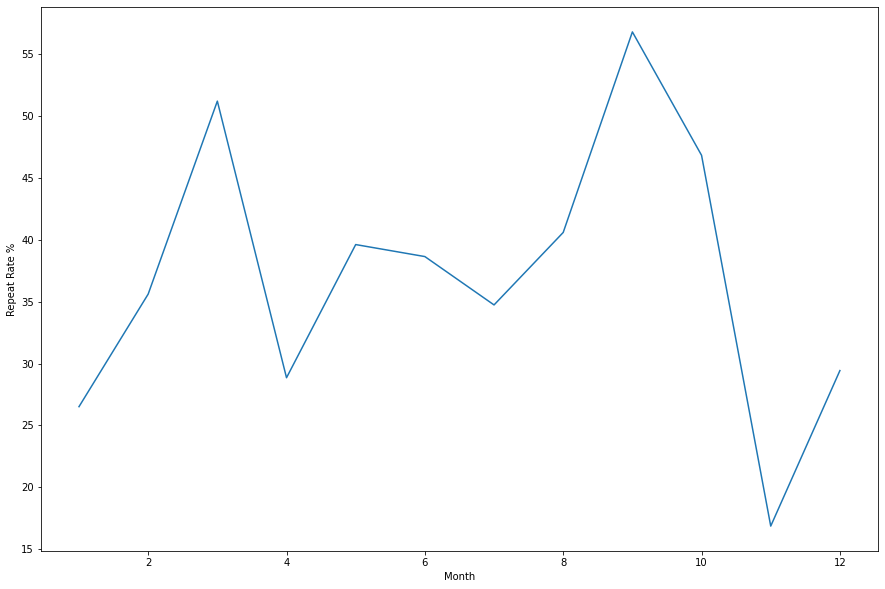

In [95]:
# convert to Dataframe
repeat_months = pd.DataFrame.from_dict(repeat_rate_m, orient='index', columns=['repeat_rate'])
# graph
_ = repeat_months.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Month')
_ = plt.ylabel('Repeat Rate %')

Think about other features that we could add: time between purchase, average dollar, difference in dollar <br>
Calculate customer lifetime value <br>
